In [2]:
from data_storage import data_storage
from data_analyze import data_analyze

from statsmodels.tsa import stattools
from statsmodels.stats.diagnostic import unitroot_adf
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime
import pytz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

C:\Users\chang\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#creating objects
stor = data_storage('crypto_base.sqlite')
analyst = data_analyze()
#creating dict for storage df
df_map = {} # store initial df directly from SQLITE
test_df_map = {} #store modified df for further analyze
#fetching 8 stablecoins data in 3 freqs
table_names = []
for coin in ['DAI', 'GUSD', 'USDT', 'USDS', 'PAX', 'TUSD', 'BTC']:
    for freq in ['h']:
        table_name = str('price_{}_USD_{}'.format(coin, freq))
        table_names.append( table_name )
        df_map[table_name] = stor.dump_data(table_name) 
#store df_map into analyst obj
for key in df_map.keys():
    analyst.adding_df( df_map[key] )

#modified df in df_map for further analyze, then create new attribute 'test_df_list', store in analyst obj
analyst.covert_to_test_df()

#extract data in 'test_df_list' to form new local map, 'test_df_map'
test_df_map = dict( zip(table_names, analyst.test_df_list) )


In [4]:
def select_time_interval(df, start, end): #start, end are type str.
    #new_df = pd.DataFrame()
    new_df = df[ df.index > start ] 
    new_df = new_df[ new_df.index< end ]
    return new_df

def plot_return(df_p1, df_p2):
    df_p1.plot(lw=0.7)
    df_p2.plot(lw=0.7)
    plt.show()

### Select target interval 2019/06/17 +- 1 week

In [108]:
#select all interval
select_interval_map = {}
select_interval_map_p1 = {}
select_interval_map_p2 = {}
select_interval_map_prev = {}

for table_name in table_names:
    select_interval_map_p1[table_name] = select_time_interval(test_df_map[table_name],'2019-06-10','2019-06-17')
    select_interval_map_p2[table_name] = select_time_interval(test_df_map[table_name],'2019-06-17','2019-06-24')
    select_interval_map_prev[table_name] = select_time_interval(test_df_map[table_name],'2019-06-03','2019-06-10')

### plot return and close price change

price_GUSD_USD_h


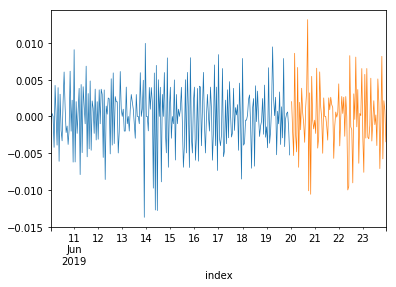

price_USDT_USD_h


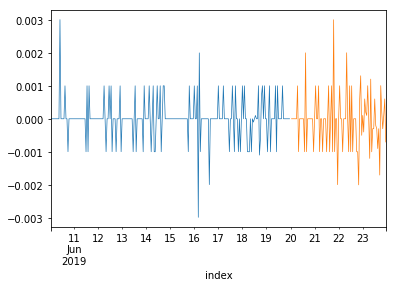

price_USDS_USD_h


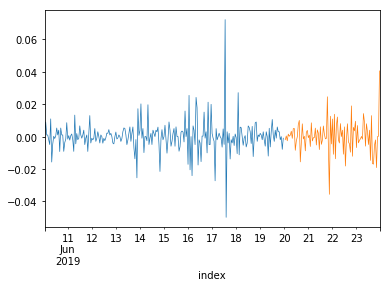

price_PAX_USD_h


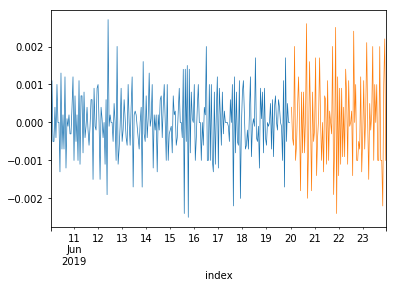

price_TUSD_USD_h


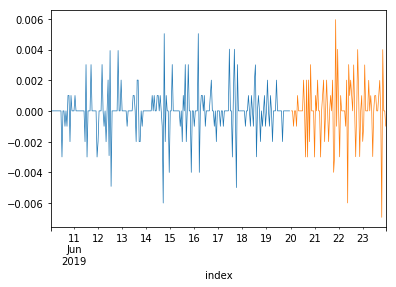

price_BTC_USD_h


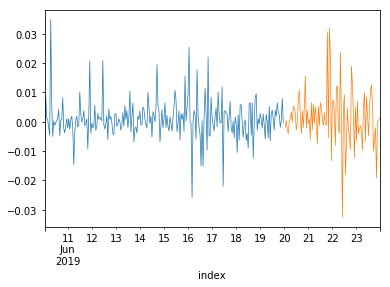

In [109]:
#plot returns hourly data
for table_name in table_names:
    if table_name[-1] != 'h' or table_name == 'price_DAI_USD_h':
        continue
    print(table_name)
    plot_return(select_interval_map_p1[table_name]['return'], select_interval_map_p2[table_name]['return'])

In [110]:
#part1 part2 return stationary test
for table_name in table_names:
    if table_name[-1] != 'h' or table_name == 'price_DAI_USD_h':
        continue
    print('\n'+table_name)
    test_p1 = unitroot_adf(select_interval_map_p1[table_name]['return'][1::])
    test_p2 = unitroot_adf(select_interval_map_p2[table_name]['return'][1::])
    print('part_1')
    print(test_p1[0],test_p1[1], test_p1[4])
    print('part_2')
    print(test_p2[0],test_p2[1],test_p2[4])


price_GUSD_USD_h
part_1
-7.38921401341 8.08380904949e-11 {'1%': -3.4591055833812772, '5%': -2.8741898504150574, '10%': -2.5735117958412097}
part_2
-9.00694520584 6.27442273495e-15 {'1%': -3.5043428982139702, '5%': -2.8938659630479413, '10%': -2.5840147047458037}

price_USDT_USD_h
part_1
-19.7055400834 0.0 {'1%': -3.4582467982399105, '5%': -2.8738137461081323, '10%': -2.5733111490323846}
part_2
-5.40902338726 3.24248256506e-06 {'1%': -3.5127380569782791, '5%': -2.8974898650628984, '10%': -2.5859487328970849}

price_USDS_USD_h
part_1
-8.0641112465 1.6134761078e-12 {'1%': -3.4596204846395824, '5%': -2.8744153028455948, '10%': -2.5736320761218576}
part_2
-11.4512026299 5.8523367631e-21 {'1%': -3.5027046095825609, '5%': -2.8931578098779522, '10%': -2.5836367129147879}

price_PAX_USD_h
part_1
-8.86758322541 1.42655683159e-14 {'1%': -3.4594900381360034, '5%': -2.8743581895178485, '10%': -2.573601605503697}
part_2
-11.1366280549 3.18338684066e-20 {'1%': -3.5035145796519269, '5%': -2.893507960

price_GUSD_USD_h


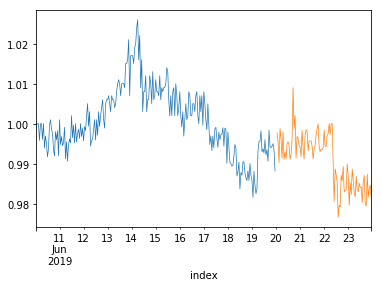

price_USDT_USD_h


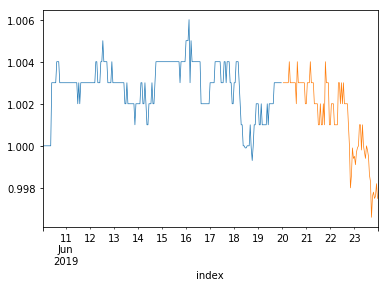

price_USDS_USD_h


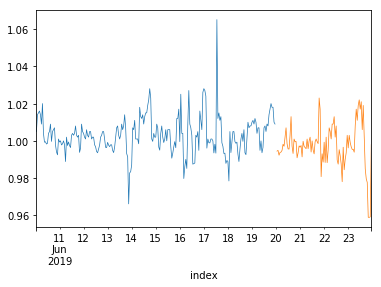

price_PAX_USD_h


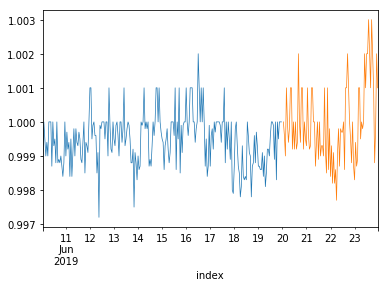

price_TUSD_USD_h


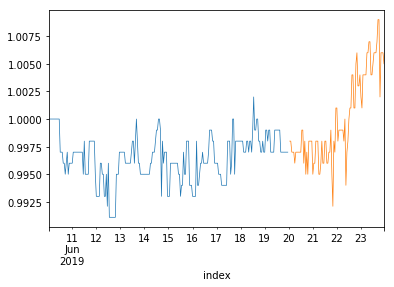

price_BTC_USD_h


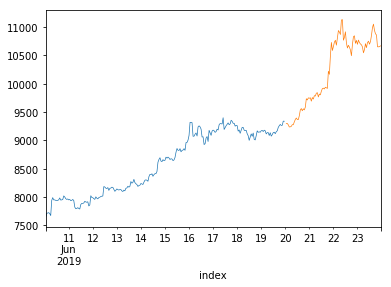

In [111]:
#plot close price hourly data only
for table_name in table_names:
    if table_name[-1] != 'h' or table_name == 'price_DAI_USD_h':
        continue
    print(table_name)
    plot_return(select_interval_map_p1[table_name]['close'], select_interval_map_p2[table_name]['close'])

In [134]:
#part1 part2 close price stationary test
for table_name in table_names:
    if table_name[-1] != 'h' or table_name == 'price_DAI_USD_h':
        continue
    print('\n'+table_name)
    test_prev = unitroot_adf(select_interval_map_prev[table_name]['close'])
    test_p1 = unitroot_adf(select_interval_map_p1[table_name]['close'])
    test_p2 = unitroot_adf(select_interval_map_p2[table_name]['close'])
    print('part_prev')
    print('stats: ',test_prev[0],' p_val:',test_prev[1], test_prev[4])
    print('part_1')
    print('stats: ',test_p1[0],' p_val:',test_p1[1], test_p1[4])
    print('part_2')
    print('stats: ',test_p2[0],' p_val:',test_p2[1],test_p2[4])


price_GUSD_USD_h
part_prev
stats:  -0.834599683168  p_val: 0.8087468463 {'1%': -3.4587311419286242, '5%': -2.8740258764297293, '10%': -2.5734243167124093}
part_1
stats:  -1.18341178917  p_val: 0.68069052832 {'1%': -3.4592326027153493, '5%': -2.8742454699025872, '10%': -2.5735414688888465}
part_2
stats:  -1.32706703929  p_val: 0.616699950631 {'1%': -3.5043428982139702, '5%': -2.8938659630479413, '10%': -2.5840147047458037}

price_USDT_USD_h
part_prev
stats:  -2.70419866868  p_val: 0.073314529821 {'1%': -3.4593607492757554, '5%': -2.8743015807562924, '10%': -2.5735714042782396}
part_1
stats:  -3.51675409174  p_val: 0.00756709572311 {'1%': -3.4582467982399105, '5%': -2.8738137461081323, '10%': -2.5733111490323846}
part_2
stats:  0.954783245326  p_val: 0.993765189862 {'1%': -3.5127380569782791, '5%': -2.8974898650628984, '10%': -2.5859487328970849}

price_USDS_USD_h
part_prev
stats:  -7.70836263693  p_val: 1.28345109276e-11 {'1%': -3.4584868856997004, '5%': -2.873918902362675, '10%': -2.5

### season decomp. close price 06/03 - 06/10, 06/010 - 06/17, 06/17 - 06/24


price_GUSD_USD_h


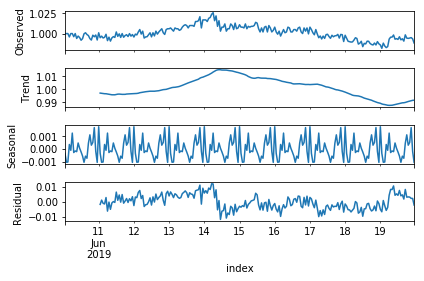

ADF test on residual
-3.45077433361 0.00934505782524 {'1%': -3.4615775784078466, '5%': -2.8752718989837249, '10%': -2.5740891037735847}

price_USDT_USD_h


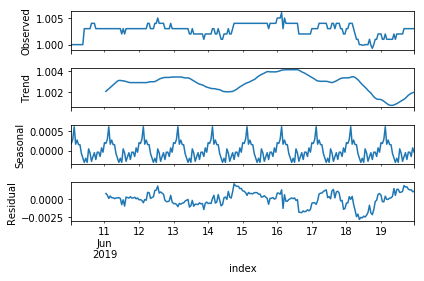

ADF test on residual
-3.34318899766 0.0130549009017 {'1%': -3.461429147102264, '5%': -2.8752069505878608, '10%': -2.5740544497344002}

price_USDS_USD_h


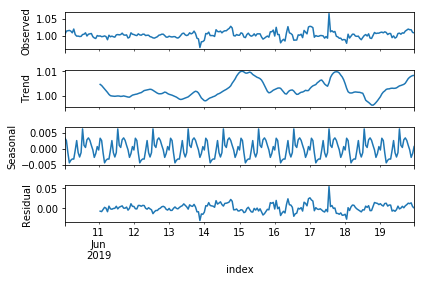

ADF test on residual
-6.21714375145 5.33167607196e-08 {'1%': -3.4617274344627398, '5%': -2.8753374677799957, '10%': -2.5741240890815571}

price_PAX_USD_h


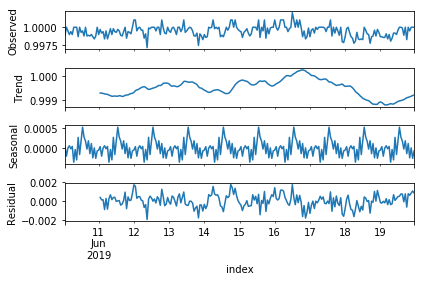

ADF test on residual
-2.72765356472 0.0693740157069 {'1%': -3.462980134086401, '5%': -2.875885461947131, '10%': -2.5744164898444515}

price_TUSD_USD_h


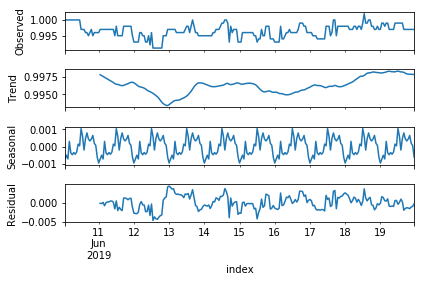

ADF test on residual
-5.06466619793 1.65032737815e-05 {'1%': -3.461429147102264, '5%': -2.8752069505878608, '10%': -2.5740544497344002}

price_BTC_USD_h


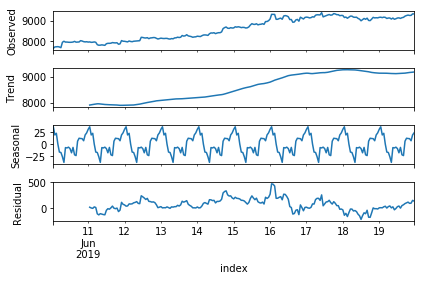

ADF test on residual
-2.8113181734 0.0566751467346 {'1%': -3.4636447617687436, '5%': -2.8761761179270766, '10%': -2.5745715858185401}


In [123]:
trend_p1= {}
resd_p1 = {}

for table_name in table_names:
    if table_name[-1] != 'h' or table_name == 'price_DAI_USD_h':
        continue
    try:    
        decomposition = seasonal_decompose(select_interval_map_p1[table_name]['close'], freq=24, model='additive',two_sided=False)
        decomposition.plot()
        print('\n'+table_name)
        plt.show()
        trend_p1[table_name] = decomposition.trend
        resd_p1[table_name] = decomposition.resid
        adf = unitroot_adf(decomposition.resid.dropna())
        print('ADF test on residual')
        print(adf[0],adf[1], adf[4])
    except:
        continue


price_GUSD_USD_h


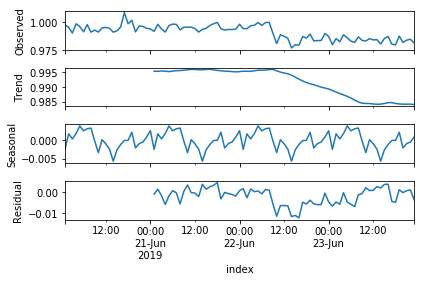

ADF test on residual
-3.86301276179 0.00232455912943 {'1%': -3.5274258688046647, '5%': -2.9038108163265308, '10%': -2.5893204081632653}

price_USDT_USD_h


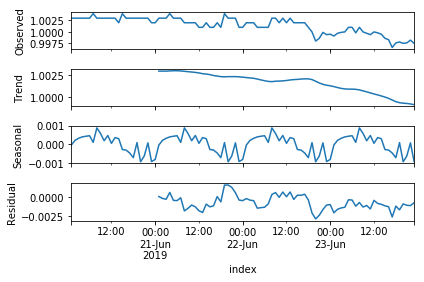

ADF test on residual
-1.06067900607 0.730495350053 {'1%': -3.548493559596539, '5%': -2.9128365947763339, '10%': -2.5941291557669439}

price_USDS_USD_h


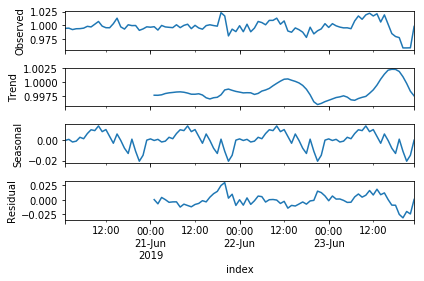

ADF test on residual
-2.7797155681 0.0612301817591 {'1%': -3.5443688564814813, '5%': -2.9110731481481484, '10%': -2.5931902777777776}

price_PAX_USD_h


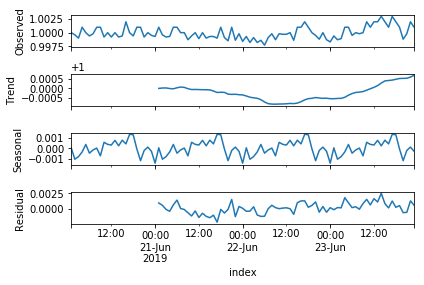

ADF test on residual
-3.346366188 0.012928915105 {'1%': -3.528889992207215, '5%': -2.9044395987933362, '10%': -2.5896556542743121}

price_TUSD_USD_h


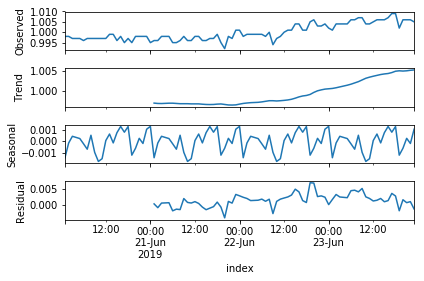

ADF test on residual
-4.36364214785 0.000344038001198 {'1%': -3.5274258688046647, '5%': -2.9038108163265308, '10%': -2.5893204081632653}

price_BTC_USD_h


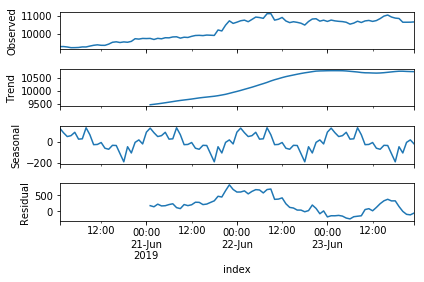

ADF test on residual
-1.82806947757 0.366617689969 {'1%': -3.5319549603840894, '5%': -2.9057551285231229, '10%': -2.5903569458676765}


In [124]:
trend_p2= {}
resd_p2 = {}

for table_name in table_names:
    if table_name[-1] != 'h' or table_name == 'price_DAI_USD_h':
        continue
    try:    
        decomposition = seasonal_decompose(select_interval_map_p2[table_name]['close'], freq=24, model='additive',two_sided=False)
        decomposition.plot()
        print('\n'+table_name)
        plt.show()
        trend_p2[table_name] = decomposition.trend
        resd_p2[table_name] = decomposition.resid
        adf = unitroot_adf(decomposition.resid.dropna())
        print('ADF test on residual')
        print(adf[0],adf[1], adf[4])
    except:
        continue


price_GUSD_USD_h


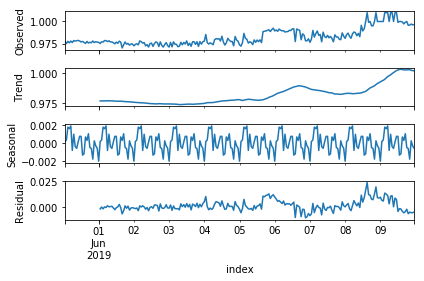

ADF test on residual
-2.71031803245 0.0722697541158 {'1%': -3.4617274344627398, '5%': -2.8753374677799957, '10%': -2.5741240890815571}

price_USDT_USD_h


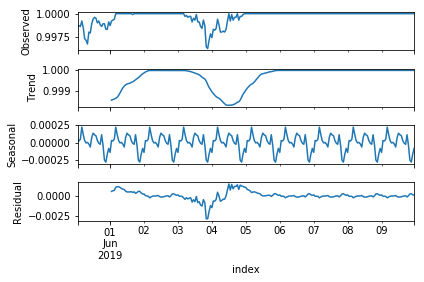

ADF test on residual
-4.36145110154 0.000347098714674 {'1%': -3.4633090972761744, '5%': -2.8760293320457442, '10%': -2.5744932593252643}

price_USDS_USD_h


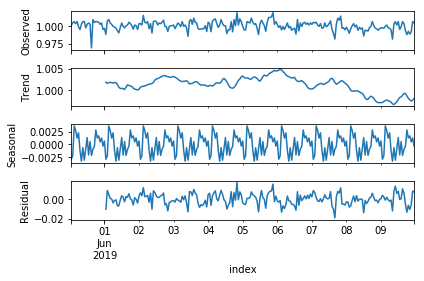

ADF test on residual
-7.74864556393 1.01590046646e-11 {'1%': -3.4617274344627398, '5%': -2.8753374677799957, '10%': -2.5741240890815571}

price_PAX_USD_h


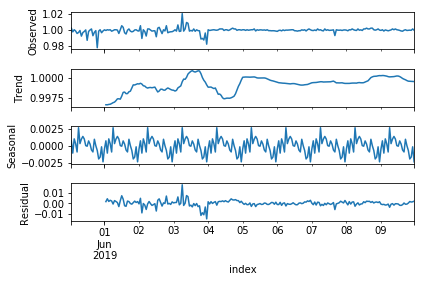

ADF test on residual
-4.4617165254 0.000230449840575 {'1%': -3.4618787358816538, '5%': -2.8754036659108091, '10%': -2.574159410430839}

price_TUSD_USD_h


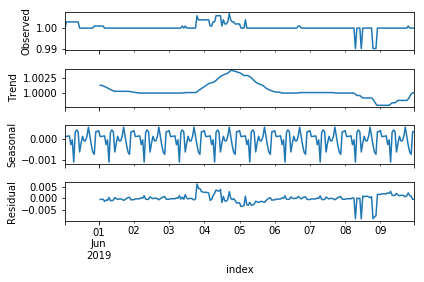

ADF test on residual
-3.12733119584 0.0245955697782 {'1%': -3.4623415245233145, '5%': -2.875606128263243, '10%': -2.5742674398469041}

price_BTC_USD_h


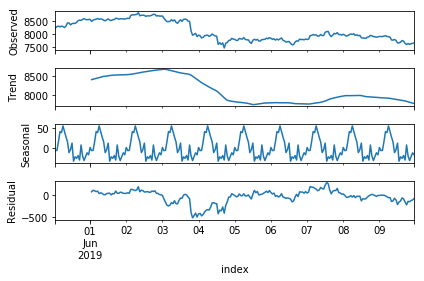

ADF test on residual
-2.80755047212 0.0572033047826 {'1%': -3.4612821203214907, '5%': -2.875142613826617, '10%': -2.5740201222814219}


In [125]:
trend_prev= {}
resd_prev = {}

for table_name in table_names:
    if table_name[-1] != 'h' or table_name == 'price_DAI_USD_h':
        continue
    try:    
        decomposition = seasonal_decompose(select_interval_map_prev[table_name]['close'], freq=24, model='additive',two_sided=False)
        decomposition.plot()
        print('\n'+table_name)
        plt.show()
        trend_prev[table_name] = decomposition.trend
        resd_prev[table_name] = decomposition.resid
        adf = unitroot_adf(decomposition.resid.dropna())
        print('ADF test on residual')
        print(adf[0],adf[1], adf[4])
    except:
        continue

### season decomp. close price 06/03 - 06/10, 06/010 - 06/17, 06/17 - 06/24

In [126]:
test_trend_prev = {}
test_trend_p1 = {}
test_trend_p2 = {}


for table_name in table_names:
    if table_name[-1] != 'h' or table_name == 'price_DAI_USD_h':
        continue
    
    try:    
        test_trend_prev[table_name] = np.array( trend_prev[table_name].dropna() )
        test_trend_p1[table_name] = np.array( trend_p1[table_name].dropna() )
        test_trend_p2[table_name] = np.array( trend_p2[table_name].dropna() )
        print('success')
    except:
        print('error!')
        continue

success
success
success
success
success
success


In [127]:
trend_p1_mtx = pd.DataFrame(test_trend_p1)
trend_p2_mtx = pd.DataFrame(test_trend_p2)
trend_prev_mtx = pd.DataFrame(test_trend_prev)

In [128]:
trend_prev_mtx.corr()

,price_BTC_USD_h,price_GUSD_USD_h,price_PAX_USD_h,price_TUSD_USD_h,price_USDS_USD_h,price_USDT_USD_h
price_BTC_USD_h,1.000000,-0.631523,-0.361698,-0.051891,0.116778,-0.143299
price_GUSD_USD_h,-0.631523,1.000000,0.380497,-0.561068,-0.638417,0.398737
price_PAX_USD_h,-0.361698,0.380497,1.000000,-0.377815,-0.225402,0.613473
price_TUSD_USD_h,-0.051891,-0.561068,-0.377815,1.000000,0.534553,-0.750819
price_USDS_USD_h,0.116778,-0.638417,-0.225402,0.534553,1.000000,-0.128447
price_USDT_USD_h,-0.143299,0.398737,0.613473,-0.750819,-0.128447,1.000000


In [129]:
trend_p1_mtx.corr()

,price_BTC_USD_h,price_GUSD_USD_h,price_PAX_USD_h,price_TUSD_USD_h,price_USDS_USD_h,price_USDT_USD_h
price_BTC_USD_h,1.000000,-0.282068,0.034082,0.394870,0.305598,-0.115469
price_GUSD_USD_h,-0.282068,1.000000,0.612857,-0.497979,0.193735,0.442949
price_PAX_USD_h,0.034082,0.612857,1.000000,-0.704304,0.279754,0.811390
price_TUSD_USD_h,0.394870,-0.497979,-0.704304,1.000000,0.110703,-0.779663
price_USDS_USD_h,0.305598,0.193735,0.279754,0.110703,1.000000,0.043218
price_USDT_USD_h,-0.115469,0.442949,0.811390,-0.779663,0.043218,1.000000


In [130]:
trend_p2_mtx.corr()

,price_BTC_USD_h,price_GUSD_USD_h,price_PAX_USD_h,price_TUSD_USD_h,price_USDS_USD_h,price_USDT_USD_h
price_BTC_USD_h,1.000000,-0.784135,-0.073769,0.772587,0.226870,-0.802117
price_GUSD_USD_h,-0.784135,1.000000,-0.503293,-0.982435,-0.219831,0.920089
price_PAX_USD_h,-0.073769,-0.503293,1.000000,0.554949,0.252329,-0.465794
price_TUSD_USD_h,0.772587,-0.982435,0.554949,1.000000,0.324964,-0.961056
price_USDS_USD_h,0.226870,-0.219831,0.252329,0.324964,1.000000,-0.394960
price_USDT_USD_h,-0.802117,0.920089,-0.465794,-0.961056,-0.394960,1.000000


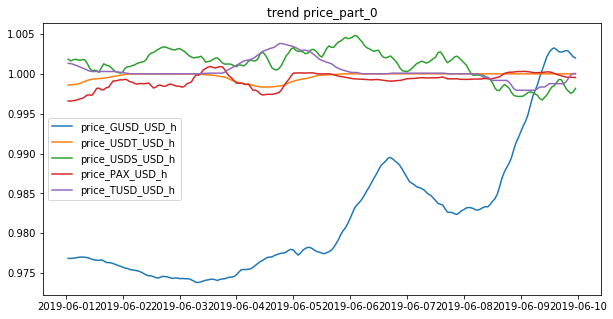

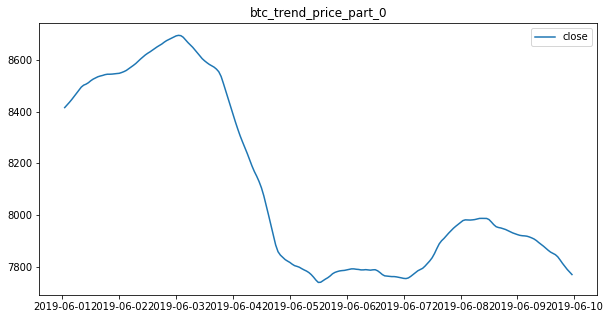

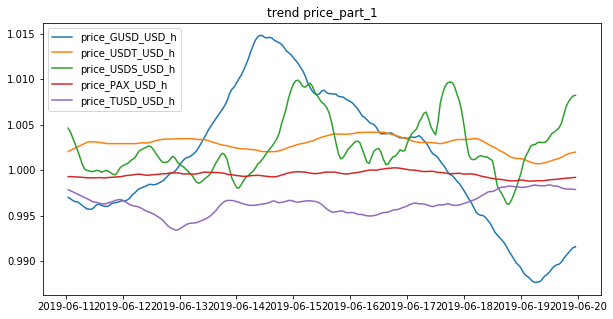

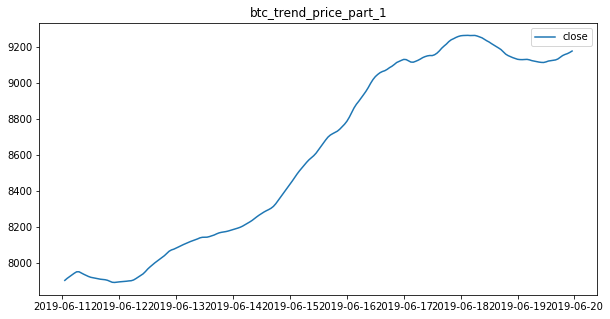

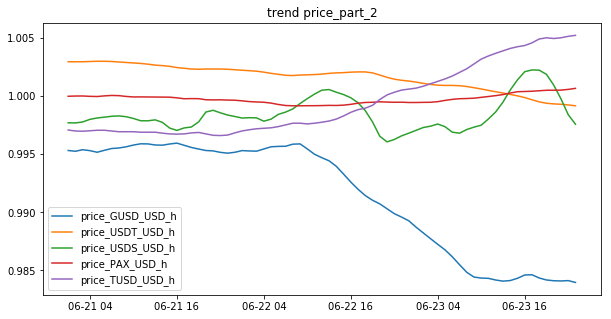

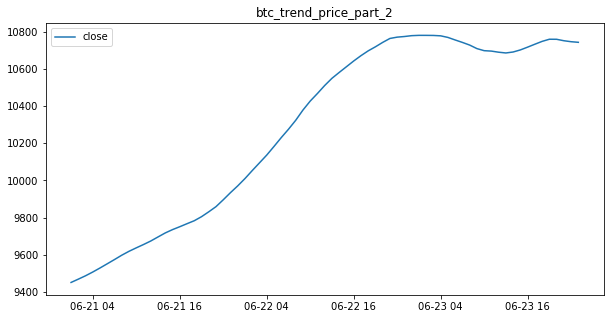

In [131]:
plt.figure(figsize=(10,5))
for table_name in table_names:
    if table_name[-1] != 'h' or table_name == 'price_DAI_USD_h' or table_name == 'price_BTC_USD_h':
        continue
    plt.plot(trend_prev[table_name], label = table_name)
plt.title('trend price_part_0')
plt.legend(loc = 'best')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(trend_prev['price_BTC_USD_h'])
plt.title('btc_trend_price_part_0')
plt.legend(loc = 'best')
plt.show()

plt.figure(figsize=(10,5))
for table_name in table_names:
    if table_name[-1] != 'h' or table_name == 'price_DAI_USD_h' or table_name == 'price_BTC_USD_h':
        continue
    plt.plot(trend_p1[table_name], label = table_name)
plt.title('trend price_part_1')
plt.legend(loc = 'best')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(trend_p1['price_BTC_USD_h'])
plt.title('btc_trend_price_part_1')
plt.legend(loc = 'best')
plt.show()

plt.figure(figsize=(10,5))
for table_name in table_names:
    if table_name[-1] != 'h' or table_name == 'price_DAI_USD_h' or table_name == 'price_BTC_USD_h':
        continue
    plt.plot(trend_p2[table_name], label = table_name)
plt.title('trend price_part_2')
plt.legend(loc = 'best')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(trend_p2['price_BTC_USD_h'])
plt.title('btc_trend_price_part_2')
plt.legend(loc = 'best')
plt.show()